In [4]:
from craft_text_detector import Craft

# set image path and export folder directory
image_path = '/home/data/Manga109s/images/AisazuNihaIrarenai/003.jpg'
image_path="007.png"
output_dir = 'output/'

# create a craft instance
craft = Craft(output_dir=output_dir, crop_type="box", cuda=True, text_threshold=.4,link_threshold=.4,low_text=.4)

# apply craft text detection and export detected regions to output directory
prediction_result = craft.detect_text(image_path)

# unload models from ram/gpu
craft.unload_craftnet_model()
craft.unload_refinenet_model()


In [47]:
from matplotlib.pyplot import imshow
%matplotlib inline
import cv2

In [ ]:
weights=home/jupyter/.craft_text_detector/weights/craft_mlt_25k.pth


In [24]:
from craft_text_detector import predict
import numpy as np
import cv2


AttributeError: 'NoneType' object has no attribute 'astype'

In [15]:
results=predict.get_prediction(image_person,craft.craft_net,cuda=True)

In [25]:
!ls /home/jupyter/ComicTransfer/data/Conan/en

ls: cannot access '/home/jupyter/ComicTransfer/data/Conan/en': No such file or directory


In [38]:
from craft_text_detector import image_utils as imgproc
import torch
from torch.autograd import Variable



In [223]:

#image_path="006.png"
image=cv2.imread(image_path,cv2.IMREAD_COLOR).astype(np.float32)
cuda=True
#import craft_text_detector.imgproc as imgproc
long_size=1280
img_resized, target_ratio, size_heatmap = imgproc.resize_aspect_ratio(
    image, long_size, interpolation=cv2.INTER_LINEAR)
ratio_h = ratio_w = 1 / target_ratio

# preprocessing
x = imgproc.normalizeMeanVariance(img_resized)
x = torch.from_numpy(x).permute(2, 0, 1)    # [h, w, c] to [c, h, w]
x = Variable(x.unsqueeze(0))                # [c, h, w] to [b, c, h, w]
print(x.shape)
if cuda:
    x = x.cuda()

# forward pass
with torch.no_grad():
    y, feature = craft.craft_net(x)

    
with torch.no_grad():
    y_refiner = craft.refine_net(y,feature)

torch.Size([1, 3, 928, 1280])


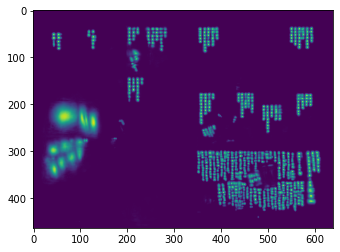

In [224]:
imshow(y[0].T[0].T.cpu().detach().numpy())

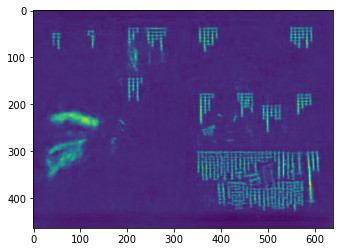

In [225]:
imshow(y_refiner[0].T[0].T.cpu().detach().numpy())

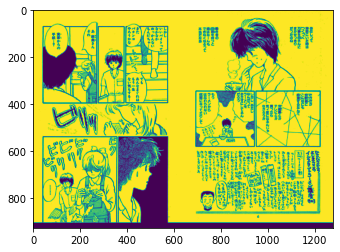

In [226]:
imshow(x[0][0].cpu().detach().numpy())


In [200]:
#img_line=x[0][0].cpu().detach().numpy()
img_line=y[0].T[0].T.cpu().detach().numpy()
coords=(prediction_result["boxes"][0]/2).astype("int")

In [219]:

image.shape

(1170, 1654, 3)

In [233]:
image.shape[1]/img_line.shape[1]

2.584375

In [236]:
copy_area=np.array(img_line)

for box in prediction_result["boxes"]:
    coords=(box/2.58).astype("int")
    
    xmin=int(coords[0][0])
    xmax=int(coords[1][0])
    ymin=int(coords[0][1])
    ymax=int(coords[2][1])

    copy_area[ymin:ymax,xmin:xmax]=.4

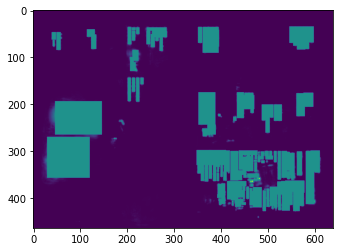

In [237]:
imshow(copy_area)

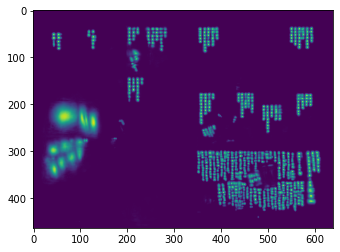

In [238]:
imshow(img_line)

In [ ]:
prediction_result

In [204]:
def resize_aspect_ratio(img, long_size, interpolation):
    height, width, channel = img.shape

    # set target image size
    target_size = long_size

    ratio = target_size / max(height, width)

    target_h, target_w = int(height * ratio), int(width * ratio)
    proc = cv2.resize(img, (target_w, target_h), interpolation=interpolation)

    # make canvas and paste image
    target_h32, target_w32 = target_h, target_w
    if target_h % 32 != 0:
        target_h32 = target_h + (32 - target_h % 32)
    if target_w % 32 != 0:
        target_w32 = target_w + (32 - target_w % 32)
    resized = np.zeros((target_h32, target_w32, channel), dtype=np.float32)
    resized[0:target_h, 0:target_w, :] = proc
    target_h, target_w = target_h32, target_w32

    size_heatmap = (int(target_w / 2), int(target_h / 2))

    return resized, ratio, size_heatmap

In [205]:
img_resized, target_ratio, size_heatmap = resize_aspect_ratio(
    image, long_size, interpolation=cv2.INTER_LINEAR)
ratio_h = ratio_w = 1 / target_ratio

NameError: name 'img' is not defined

In [115]:
x = imgproc.normalizeMeanVariance(img_resized)
x = torch.from_numpy(x).permute(2, 0, 1) 

array([[395,  47],
       [453,  47],
       [453,  59],
       [395,  59]])

In [127]:
y.shape

torch.Size([1, 640, 464, 2])

torch.Size([1, 32, 640, 464])